In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy as np
import pandas as pd
import warnings
import sys

sys.path.append("../src")
from margin_calibration import MarginCalibration

In [60]:
warnings.simplefilter("ignore")

# Dataset Generation

In [61]:
# Create a 100 random observations with their respective
# sampling weights, such that those weights sum to 20 %
n_obs = 100
sampling_probabilities = np.random.rand(n_obs, 1).flatten()
sampling_probabilities = sampling_probabilities / sampling_probabilities.sum() *.2

# Create a matrix of size n_obs * n_margins, with margins ranging from 0 to 1000
n_margins = 2 # Let say we have two variables
calibration_matrix = 1000*np.random.rand(n_obs, n_margins)

# Now we create the calibration target
# It is of sier n_margins * 1 and contains the 
# sums of the margins over all the population
calibration_target = np.array([np.sum(calibration_matrix[:, i])*100 for i in range(calibration_matrix.shape[1])])

# The costs should be of size of the number of margins
costs = (1,1) # We give here same costs to both variables

# Let say we want to work with want to work with pandas dataframes 
# instead of numpy arrays
sampling_probabilities = pd.DataFrame(sampling_probabilities, columns=["weights"])
calibration_matrix = pd.DataFrame(calibration_matrix, columns = ["margin1", "margin2"])
calibration_target = pd.DataFrame(calibration_target, columns = ["margin_sums"])

# Margin Calibration

In [72]:
mc=MarginCalibration()
mc_logit=MarginCalibration("logit", .5, 1.5)
mc_rr=MarginCalibration("raking_ratio")
mc_lt=MarginCalibration("truncated_linear", .5, 1.5)

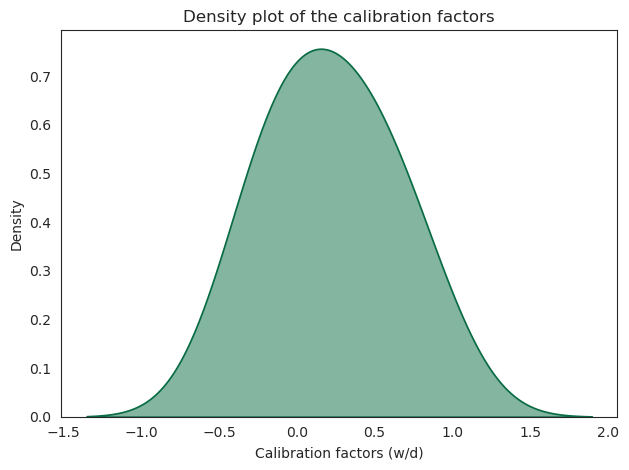

CPU times: user 7.97 s, sys: 19.4 ms, total: 7.99 s
Wall time: 2.19 s


array([ 455.73514771,  257.2403849 ,   73.77442225,   83.05968171,
        124.06466874,  159.35825366,  161.34675981, 1149.40357282,
         75.10499292,  487.46283279,   37.24496724, -132.62928192,
        -75.49957288, -124.03044602,  -27.10149551, 1306.78601857,
        125.09956802,  247.19631614, -179.81571151,   45.46705882,
       -528.20168289,  129.87595364,  255.65691193,  302.58425254,
       -128.77605873,  -21.50955422, -312.97984258,   21.17640936,
        -51.28379785,  114.06701093,  147.22050334,  -49.13476294,
       9777.30008091, -627.85201323, -114.80792211,  245.23733166,
        621.38593678,  545.96415873,  -43.58139872,  155.40675103,
        282.66309713, -202.23976998,   52.1673295 ,  251.65942211,
        241.70627564, -625.25485576,  -13.75965049,  -99.81667256,
       -119.30831553,  125.32406042,   22.27679097,  602.93632306,
        238.79407607,  107.93774951,  441.60789135,   17.13099018,
        -29.89386458,  250.01989768, -101.70362935,   84.91837

In [73]:
%%time
mc.calibration(sampling_probabilities, calibration_matrix, calibration_target)

In [74]:
%%time
mc_logit.calibration(sampling_probabilities, calibration_matrix, calibration_target)

KeyboardInterrupt: 

In [ ]:
%%time
mc_rr.calibration(sampling_probabilities, calibration_matrix, calibration_target)

In [ ]:
%%time
mc_lt.calibration(sampling_probabilities, calibration_matrix, calibration_target)

# Penalized Margin Calibration

In [67]:
mc_pen=MarginCalibration(penalty=.1, costs=costs)
mc_logit_pen=MarginCalibration("logit", .5, 1.5, penalty=.1, costs=costs)
mc_rr_pen=MarginCalibration("raking_ratio", penalty=.1, costs=costs)
mc_lt_pen=MarginCalibration("truncated_linear", .5, 1.5, penalty=.1, costs=costs)

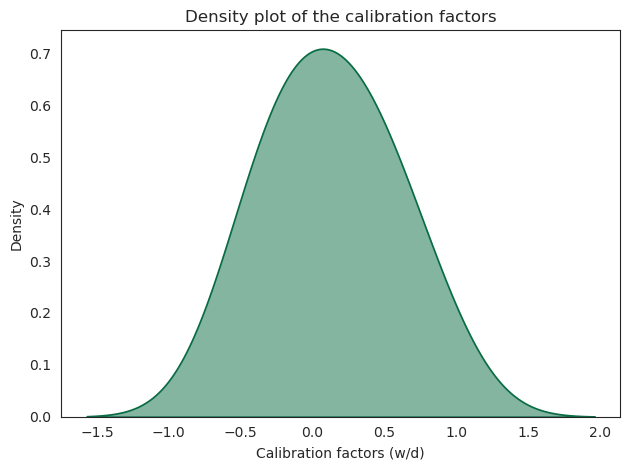

CPU times: user 6.6 s, sys: 15.6 ms, total: 6.62 s
Wall time: 349 ms


array([ 4.48221666e+02,  2.15731565e+02,  3.49544960e+01,  4.47737266e+01,
        1.02258125e+02,  1.24390034e+02,  1.41803325e+02,  9.88618428e+02,
        8.32833027e+00,  4.35017685e+02,  1.15568727e+01, -2.09424914e+02,
       -1.03989145e+02, -2.21322192e+02, -6.72098676e+01,  1.22445722e+03,
        1.01684844e+02,  1.79457534e+02, -2.41733667e+02,  3.79943023e+01,
       -2.05921712e+03,  9.10168509e+01,  2.22006876e+02,  2.58057024e+02,
       -1.74494539e+02, -1.06535620e+02, -5.17800181e+02, -8.74888573e+01,
       -9.52259862e+01,  7.24131047e+01,  6.68757208e+01, -9.31731729e+01,
        8.96246129e+03, -8.80261267e+02, -1.91404623e+02,  2.31167361e+02,
        5.91424763e+02,  5.26572689e+02, -1.50796280e+02,  4.80492626e+01,
        2.61263320e+02, -3.21086520e+02,  8.53192024e+00,  2.31255498e+02,
        1.83260019e+02, -8.52876125e+02, -3.94813666e+01, -1.77546793e+02,
       -1.57214114e+02,  9.15815749e+01,  5.55018470e+00,  5.84669976e+02,
        1.95156322e+02,  

In [68]:
%%time
mc_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

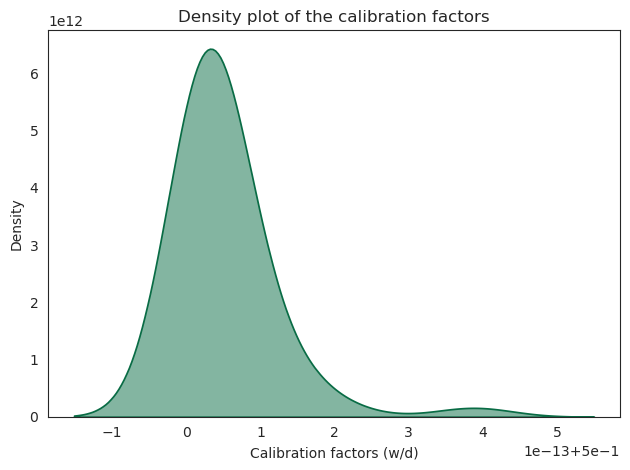

CPU times: user 7.09 s, sys: 11.5 ms, total: 7.1 s
Wall time: 862 ms


array([  252.98546589,   331.807492  ,   134.90854451,   235.92719496,
         147.24713527,   144.92591317,   186.40186709,  1033.92440184,
         256.03427346,   446.07892769,   138.76066086,   341.69273856,
         168.2253237 ,   374.57793523,   156.64382404,  1082.6981138 ,
         137.90387446,   269.83195164,   213.79272859,   142.47938854,
        6233.71632199,   153.61709931,   182.06350392,   263.24398037,
         186.15296079,   290.88006081,  1189.36651946,   509.80546208,
         215.91141937,   247.6266396 ,   325.33325482,   184.15115216,
       17380.83942883,  2057.61322362,   245.49831689,   305.24541183,
         458.06453447,   323.34851741,   491.85264512,   388.23954783,
         175.55844273,   546.02646362,   157.38353402,   225.29991605,
         245.90970473,   754.25979339,   196.67710561,   246.53064574,
         137.64591856,   230.45057273,   138.34331828,   510.9476757 ,
         198.33054115,   156.7295361 ,   873.28142019,   392.46212146,
      

In [69]:
%%time
mc_logit_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

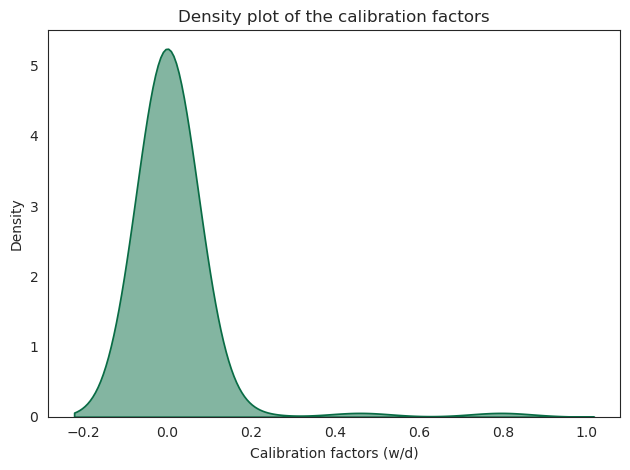

CPU times: user 7.29 s, sys: 62.6 ms, total: 7.35 s
Wall time: 1.08 s


array([2.50899444e-04, 3.45470724e-05, 3.76950123e-05, 2.56069978e-05,
       3.86457379e-05, 6.93497253e-05, 3.64000407e-05, 6.12888343e-05,
       2.86720418e-05, 5.08694802e-05, 2.47554398e-05, 1.74253530e-05,
       1.57792080e-05, 1.84824896e-05, 2.04063382e-05, 5.28795696e-05,
       4.49691721e-05, 5.44199356e-05, 1.47950143e-05, 1.56229022e-05,
       2.35295308e-05, 5.06261186e-05, 1.46282110e-04, 6.58843984e-05,
       1.52571130e-05, 2.28112783e-05, 1.45581963e-05, 2.19273406e-05,
       1.62563231e-05, 2.81110790e-05, 3.23310909e-05, 1.87560177e-05,
       5.74900637e+03, 1.67237362e-05, 1.10222060e-05, 3.03552377e-05,
       6.50222491e-05, 1.81450478e-04, 2.04432112e-05, 3.23017959e-05,
       2.10139753e-04, 1.05874408e-05, 3.01692900e-05, 4.78442280e-05,
       6.30120356e-05, 1.50589836e-05, 1.80581449e-05, 1.43973368e-05,
       1.45707076e-05, 2.91966098e-05, 2.11465197e-05, 4.13318304e-05,
       9.45747727e-05, 4.49076480e-05, 2.54847770e-05, 1.99172129e-05,
      

In [70]:
%%time
mc_rr_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

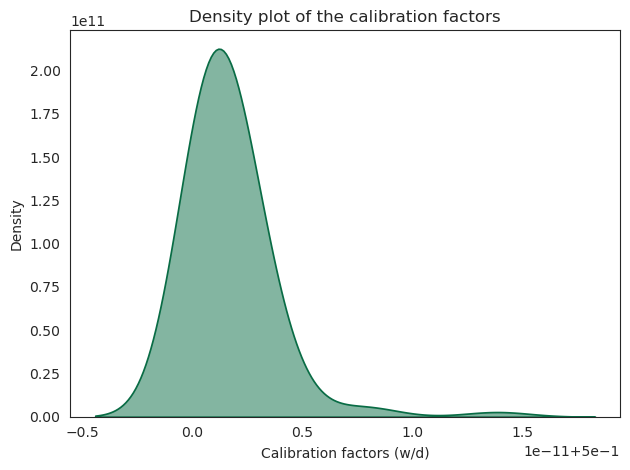

CPU times: user 7.28 s, sys: 7.76 ms, total: 7.29 s
Wall time: 977 ms


array([  252.9854659 ,   331.807492  ,   134.90854451,   235.92719497,
         147.24713527,   144.92591318,   186.40186709,  1033.92440184,
         256.03427346,   446.07892769,   138.76066086,   341.69273856,
         168.2253237 ,   374.57793523,   156.64382404,  1082.6981138 ,
         137.90387446,   269.83195164,   213.79272859,   142.47938854,
        6233.71632199,   153.61709931,   182.06350392,   263.24398037,
         186.15296079,   290.88006081,  1189.36651946,   509.80546208,
         215.91141937,   247.6266396 ,   325.33325482,   184.15115216,
       17380.83942883,  2057.61322362,   245.49831689,   305.24541183,
         458.06453447,   323.34851741,   491.85264512,   388.23954783,
         175.55844273,   546.02646362,   157.38353402,   225.29991605,
         245.90970473,   754.25979339,   196.67710561,   246.53064574,
         137.64591856,   230.45057273,   138.34331828,   510.9476757 ,
         198.33054115,   156.7295361 ,   873.28142019,   392.46212146,
      

In [71]:
%%time
mc_lt_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)